In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt

In [67]:
import warnings

warnings.filterwarnings('ignore')


# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 10]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [3]:
url = 'https://raw.githubusercontent.com/franciscofijamo/machine_learng_handson/master/carros.csv'

df = pd.read_csv(url)

In [4]:
df.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


# Resume dataset


In [5]:
df.dtypes

year             int64
model           object
price            int64
mileage          int64
color           object
transmission    object
dtype: object

In [14]:
df.price.describe()

count      150.000000
mean     12961.933333
std       3122.481735
min       3800.000000
25%      10995.000000
50%      13591.500000
75%      14904.500000
max      21992.000000
Name: price, dtype: float64

In [15]:
# claculing the range
print("A diferenca entre o preco min e maximo: {}".format(df.price.max() - df.price.min()))


a diferenca entre o preco min e maximo: 18192


In [37]:
# calculing percentile '0,25,50,75,100'
ax = np.percentile(df.price, [0,25,50,75,100])
# calculing percentile  '1,99'
ax1 = np.percentile(df.price, [1,99])


print('Calculing perncetil 1, 99 : {}'.format(ax1))
print('Calculing perncetil [0,25,50,75,100] : {}'.format(ax))

Calculing perncetil 1, 99 : [ 5428.69 20505.  ]
Calculing perncetil [0,25,50,75,100] : [ 3800.  10995.  13591.5 14904.5 21992. ]


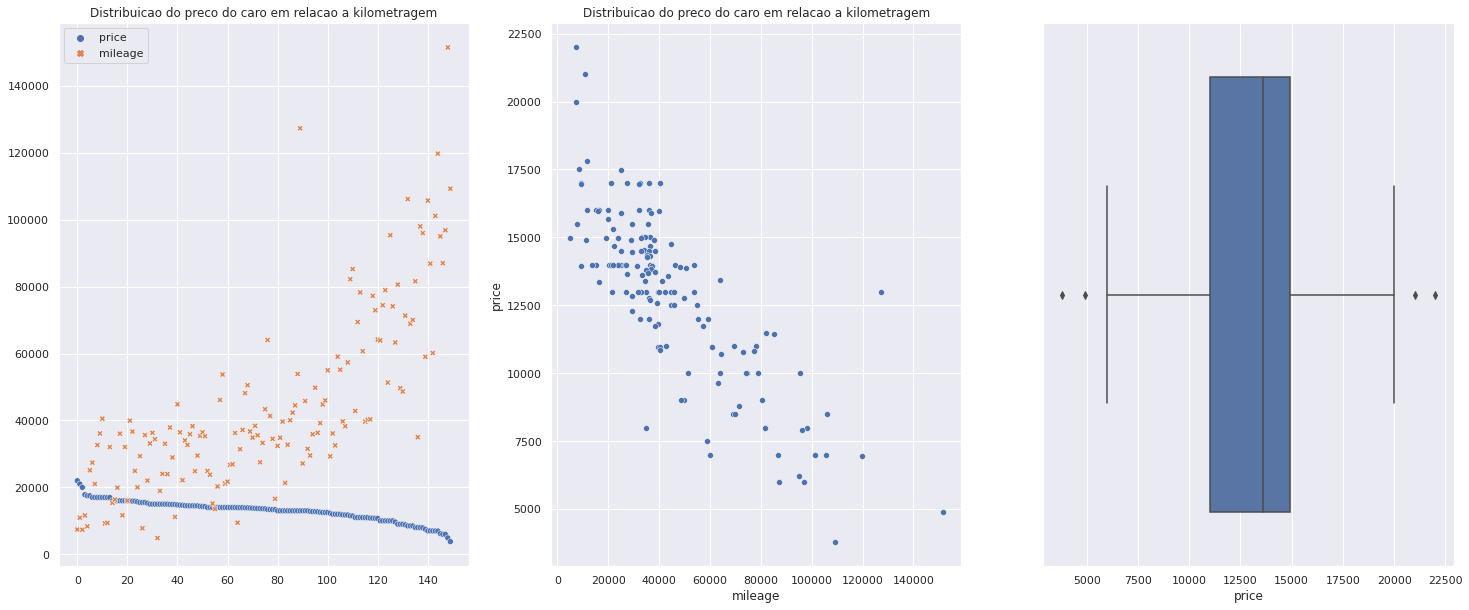

In [68]:
subplot(1,3,1)
plt.title("Distribuicao do preco do caro em relacao a kilometragem")
columns = ['price', 'mileage']
sns.scatterplot(data = df[columns]) 

subplot(1,3,2)
plt.title("Distribuicao do preco do caro em relacao a kilometragem")
sns.scatterplot(x= 'mileage', y = 'price', data = df)

subplot(1,3,3)
sns.boxplot(df['price'], orient='h');



Constatamos que quando a kilometragem  aumenta o preco do carro reduz, ou seja quanto maior for a quilometragem entendemos que menor o calo vale.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcef3e1dc50>,
      dtype=object)

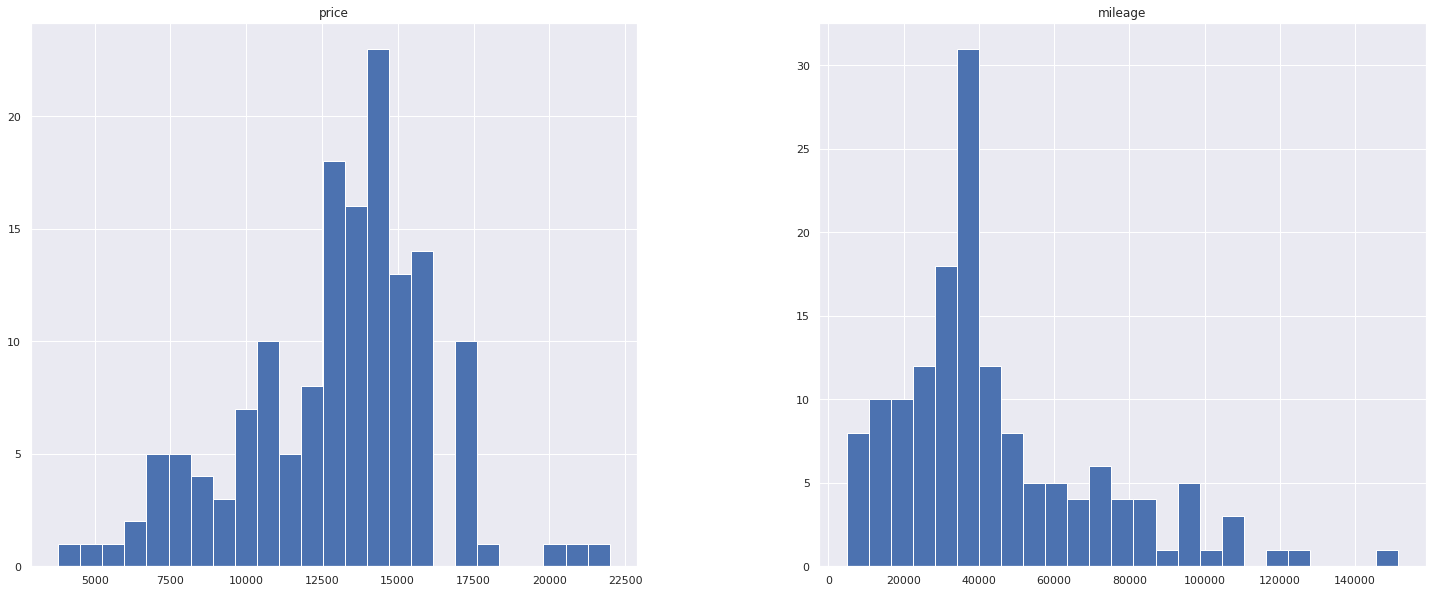

In [72]:
df[columns].hist(bins = 25);

In [80]:
# Tabela de Frequencia 
df['year'].value_counts()

2010    49
2009    42
2011    16
2008    14
2007    11
2006     6
2004     3
2000     3
2005     2
2012     1
2003     1
2002     1
2001     1
Name: year, dtype: int64

In [84]:
model_frq = df['model'].value_counts()
model_frq/len(df) # proporcao de frequencia (percentual)

SE     0.520000
SES    0.326667
SEL    0.153333
Name: model, dtype: float64

In [86]:
color_frq = df['color'].value_counts()
color_frq/len(df) # proporcao de frequencia (percentual)

Black     0.233333
Silver    0.213333
Red       0.166667
Blue      0.113333
White     0.106667
Gray      0.106667
Green     0.033333
Yellow    0.020000
Gold      0.006667
Name: color, dtype: float64

In [89]:
# agregate functions


# qual e a media do preco     -    agrupado por ano
# preco > por ano
df[['price', 'year']].groupby('year').mean().reset_index()


,year,price
0,2000,5586.666667
1,2001,4899.000000
2,2002,5995.000000
3,2003,7900.000000
4,2004,6976.333333
5,2005,9241.500000
6,2006,8330.666667
7,2007,9747.363636
8,2008,11156.500000
9,2009,13145.428571
